In [40]:
! curl http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt > 160402.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.2M    0 24.2M    0     0  2797k      0 --:--:--  0:00:08 --:--:-- 3030k


In [41]:
import csv
from collections import defaultdict
import dateutil.parser

In [42]:
mta = defaultdict(list)
mta2 = defaultdict(list)
mta3 = defaultdict(list)
with open('160402.csv', 'r') as f:
    reader = csv.reader(f)
    reader.next() #skip header row
    for row in reader:
        #read in all of the columns
        ca = row[0]
        unit = row[1]
        scp = row[2]
        station = row[3]
        linename = row[4]
        division = row[5]
        date = row[6]
        time = row[7]
        datetime = dateutil.parser.parse(row[6]+" "+row[7])
        desc = row[8]
        entries = row[9]
        exits = row[10].strip()
                
        #add data to each dictionary
        #use append to add more than one value to one key
        mta[(ca, unit, scp, station)].append([linename, division, date, time, desc, entries, exits])
        mta2[(ca, unit, scp, station)].append([datetime, int(entries)]) #convert entries to numbers from str
        if datetime.hour==0 or datetime.hour==1:
            mta3[ca, unit, scp, station].append([datetime, int(entries)])

In [43]:
for key in mta2: #loop through each key in dictionary
    for i in range(len(mta2[key])-1): #loop through each list of values
        mta2[key][i][1] = abs(mta2[key][i+1][1] - mta2[key][i][1]) #key, list, item in list
    mta2[key].pop() #remove the last date

In [44]:
mta2

defaultdict(list,
            {('J012',
              'R379',
              '00-00-00',
              'KOSCIUSZKO ST'): [[datetime.datetime(2016, 3, 26, 1, 0),
               67], [datetime.datetime(2016, 3, 26, 5, 0), 196], [datetime.datetime(2016, 3, 26, 9, 0),
               359], [datetime.datetime(2016, 3, 26, 13, 0),
               404], [datetime.datetime(2016, 3, 26, 17, 0), 294], [datetime.datetime(2016, 3, 26, 21, 0),
               145], [datetime.datetime(2016, 3, 27, 1, 0),
               43], [datetime.datetime(2016, 3, 27, 5, 0), 144], [datetime.datetime(2016, 3, 27, 9, 0),
               282], [datetime.datetime(2016, 3, 27, 13, 0),
               308], [datetime.datetime(2016, 3, 27, 17, 0), 195], [datetime.datetime(2016, 3, 27, 21, 0),
               117], [datetime.datetime(2016, 3, 28, 1, 0),
               55], [datetime.datetime(2016, 3, 28, 5, 0), 642], [datetime.datetime(2016, 3, 28, 9, 0),
               460], [datetime.datetime(2016, 3, 28, 13, 0),
           

In [45]:
for key in mta3: #loop through each key in dictionary
    for i in range(len(mta3[key])-1): #loop through each list of values
        mta3[key][i][1] = abs(mta3[key][i+1][1] - mta3[key][i][1]) #key, list, item in list
    mta3[key].pop() #remove the last date

In [46]:
mta3

defaultdict(list,
            {('J012',
              'R379',
              '00-00-00',
              'KOSCIUSZKO ST'): [[datetime.datetime(2016, 3, 26, 1, 0),
               1465], [datetime.datetime(2016, 3, 27, 1, 0),
               1089], [datetime.datetime(2016, 3, 28, 1, 0), 1912], [datetime.datetime(2016, 3, 29, 1, 0),
               2079], [datetime.datetime(2016, 3, 30, 1, 0),
               2136], [datetime.datetime(2016, 3, 31, 1, 0), 2171]],
             ('H019',
              'R294',
              '00-06-00',
              'MORGAN AV'): [[datetime.datetime(2016, 3, 26, 0, 0),
               1375], [datetime.datetime(2016, 3, 27, 0, 0),
               889], [datetime.datetime(2016, 3, 28, 0, 0),
               1248], [datetime.datetime(2016, 3, 29, 0, 0),
               1376], [datetime.datetime(2016, 3, 30, 0, 0),
               1452], [datetime.datetime(2016, 3, 31, 0, 0), 1363]],
             ('N131',
              'R383',
              '00-00-01',
              '80 ST')

In [47]:
%matplotlib inline

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
"""
list_data =[]
list_weeks = ['160102', '160109', '160116','160130','160206','160213',
              '160220','160227','160305','160312','160319','160326','160402']
for u in list_weeks:
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + u + '.txt'
    print(url)
    list_data.append(pd.read_csv(url))

data = pd.concat(list_data)
del list_data"""

"\nlist_data =[]\nlist_weeks = ['160102', '160109', '160116','160130','160206','160213',\n              '160220','160227','160305','160312','160319','160326','160402']\nfor u in list_weeks:\n    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + u + '.txt'\n    print(url)\n    list_data.append(pd.read_csv(url))\n\ndata = pd.concat(list_data)\ndel list_data"

In [96]:
#data = pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_160402.txt")

In [97]:
data.columns = [column.strip() for column in data.columns]
data.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRY', u'EXIT', u'dENTRY', u'dEXIT', u'dTOTAL',
       u'DATETIME', u'HOUR', u'WEEKDAY', u'DAYOFWEEK'],
      dtype='object')

In [98]:
data.rename(columns={"EXITS": "EXIT", "ENTRIES": "ENTRY"}, inplace=True)

In [99]:
data['dENTRY'] = 0
data['dEXIT'] = 0

In [100]:
data['dENTRY'] = data.ENTRY.shift(-1) - data.ENTRY
data['dEXIT'] = data.EXIT.shift(-1) - data.EXIT
data['dTOTAL'] = data.dENTRY + data.dEXIT

In [101]:
#diff = data['ENTRY'].iloc[1:].values - data['ENTRY'].iloc[:-1].values
#data['DENTRY'][1:] = diff
#diff = data['EXIT'].iloc[:-1].values - data['EXIT'].iloc[1:].values
#data['DEXIT'][1:] = diff

In [102]:
data['DATETIME'] = pd.to_datetime(data.DATE + data.TIME, format='%m/%d/%Y%H:%M:%S')
data['HOUR'] = data['DATETIME'].apply(lambda x: x.hour)

In [103]:
data['WEEKDAY']=data.DATETIME.apply(lambda x: 'Weekday' if 0<=x.weekday()<5 else 'Weekend')

In [104]:
daysofweek = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

whatdayofweek = lambda x: daysofweek[x.weekday()]


data['DAYOFWEEK'] = data.DATETIME.apply(whatdayofweek)

In [105]:
data_cleaned = data[(data['dENTRY'] >= 0) & (data['dENTRY'] <= 5000) & (data['dEXIT'] >= 0) & (data['dEXIT'] <= 5000)]

In [106]:
data_0to4 = data_cleaned[(data_cleaned.HOUR ==0)|(data_cleaned.HOUR==1)]

In [107]:
data_0to4

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRY,EXIT,dENTRY,dEXIT,dTOTAL,DATETIME,HOUR,WEEKDAY,DAYOFWEEK
504,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,12/26/2015,01:00:00,REGULAR,2019275,3566726,12,6,18,2015-12-26 01:00:00,1,Weekend,Saturday
510,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,12/27/2015,01:00:00,REGULAR,2020556,3568504,14,8,22,2015-12-27 01:00:00,1,Weekend,Sunday
516,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,12/28/2015,01:00:00,REGULAR,2021633,3569933,7,12,19,2015-12-28 01:00:00,1,Weekday,Monday
522,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,12/29/2015,01:00:00,REGULAR,2023488,3572923,24,19,43,2015-12-29 01:00:00,1,Weekday,Tuesday
528,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,12/30/2015,01:00:00,REGULAR,2025243,3575846,28,20,48,2015-12-30 01:00:00,1,Weekday,Wednesday
534,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,12/31/2015,01:00:00,REGULAR,2027163,3578910,21,69,90,2015-12-31 01:00:00,1,Weekday,Thursday
540,A006,R079,00-00-00,5 AV/59 ST,NQR,BMT,01/01/2016,01:00:00,REGULAR,2028761,3581396,2,7,9,2016-01-01 01:00:00,1,Weekday,Friday
546,A006,R079,00-00-01,5 AV/59 ST,NQR,BMT,12/26/2015,01:00:00,REGULAR,3289224,2153861,18,5,23,2015-12-26 01:00:00,1,Weekend,Saturday
552,A006,R079,00-00-01,5 AV/59 ST,NQR,BMT,12/27/2015,01:00:00,REGULAR,3290371,2154540,16,1,17,2015-12-27 01:00:00,1,Weekend,Sunday
558,A006,R079,00-00-01,5 AV/59 ST,NQR,BMT,12/28/2015,01:00:00,REGULAR,3291290,2155137,14,1,15,2015-12-28 01:00:00,1,Weekday,Monday


In [108]:
data_grouped = data_0to4.groupby(['WEEKDAY','STATION']).sum()

In [109]:
data_grouped

ENTRY          EXIT  dENTRY  dEXIT  dTOTAL  \
WEEKDAY STATION                                                             
Weekday 1 AV             21134059178   21932208010    9721   5313   15034   
        103 ST            9218635553   30466847914   16131  25107   41238   
        103 ST-CORONA      936911609     897358198    3170  14214   17384   
        104 ST           18747542983   10987928062     662   1004    1666   
        110 ST             392135677     401063881    2570   5718    8288   
        111 ST            3276355623    1503921823    2425   8290   10715   
        116 ST           29561965193   30529961997   29567  30992   60559   
        116 ST-COLUMBIA  78642778901   16643200360    9465   4500   13965   
        121 ST             119661954      98985228     847    579    1426   
        125 ST           18051447693   13410634075   50343  58623  108966   
        135 ST           13641501445    2210675258    6530   8479   15009   
        137 ST CITY COL   3992441577    3551045103    9874  26199   36073   
        138/GRAND CONC   14944849173   14432420449    1077   1552    2629   
        14 ST            21848883891    5538325320   47342  17821   65163   
        14 ST-UNION SQ   87168398335   32491281666  139343  51257  190600   
        145 ST           22141041002   31227688601    7245  21885   29130   
        149/GRAND CONC    7934865378    3081287798    4341   5317    9658   
        14TH STREET        196801046      77535475    5865   3541    9406   
        15 ST-PROSPECT    1792014679     126638045     382    606     988   
        155 ST            2012887076    1534396509    6880  13137   20017   
        157 ST            2071620098    1387282981    9783  23030   32813   
        161/YANKEE STAD   9318456438    3511722833    4731   5367   10098   
        163 ST-AMSTERDM  30381821932   10700595747    3190   6606    9796   
        167 ST           22178625477   10807102444    4202  10205   14407   
        168 ST            2054389136     895501227    4722   5700   10422   
        169 ST             370317972     394113426    1320   3865    5185   
        170 ST           80757940822  148159141705    8046  15424   23470   
        174 ST            1417934478     949715334    6693  14135   20828   
        174-175 STS        224096292     150870465    1181    944    2125   
        175 ST            2198880607     288262925    1360   4149    5509   
...                              ...           ...     ...    ...     ...   
Weekend SUTPHIN-ARCHER     604709798     307065750    3639   6095    9734   
        SUTTER AV          283406076     388003712    2056   4875    6931   
        SUTTER AV-RUTLD    112817309      65729858     476   1327    1803   
        THIRTY ST           49810845      55857111    4379   1132    5511   
        THIRTY THIRD ST    150176926      97943593    7296   2306    9602   
        TIMES SQ-42 ST   15299294874   12322689011   26548   7822   34370   
        TOMPKINSVILLE      189944205      53129738     251      0     251   
        TREMONT AV        3358771351     283203114    3794  11527   15321   
        TWENTY THIRD ST     28933404      10224952    1190    632    1822   
        UNION ST            80563402      84943176    1002    831    1833   
        UTICA AV          2651490454    1305216366    7264  16724   23988   
        V.CORTLANDT PK      89954706      30914341     275    777    1052   
        VAN SICLEN AV      390520175     348523833    1161   3598    4759   
        VAN SICLEN AVE     345802477     358775238    1321   4842    6163   
        VERNON-JACKSON     131235448      88484400     689   1034    1723   
        W 4 ST-WASH SQ   20895976200   23300734723   85393  27217  112610   
        W 8 ST-AQUARIUM     43702088      47895861      61    127     188   
        WAKEFIELD/241      421024985     435502309    3052   7752   10804   
        WALL ST          12172426121    6500704665    3026   2727    5753   
        WEST FARMS SQ    11

In [110]:
data_reset = (data_grouped
    .reset_index()
    .sort_values(['WEEKDAY', 'dTOTAL'], ascending=(True, False))
)
data_reset

,WEEKDAY,STATION,ENTRY,EXIT,dENTRY,dEXIT,dTOTAL,HOUR
14,Weekday,14 ST-UNION SQ,87168398335,32491281666,139343,51257,190600,570
358,Weekday,W 4 ST-WASH SQ,51527184030,57431162342,97174,33343,130517,278
113,Weekday,96 ST,50538865727,92441471536,47260,62372,109632,435
9,Weekday,125 ST,18051447693,13410634075,50343,58623,108966,260
68,Weekday,42 ST-PORT AUTH,68037837777,42759193691,65606,35826,101432,944
229,Weekday,GRD CNTRL-42 ST,233775067966,78703954085,65606,33356,98962,480
103,Weekday,8 AV,12909263120,5968068395,63583,28136,91719,270
196,Weekday,DELANCEY/ESSEX,111241788642,72250461670,46920,40325,87245,285
61,Weekday,34 ST-PENN STA,132336799618,73761645029,47886,34195,82081,1050
13,Weekday,14 ST,21848883891,5538325320,47342,17821,65163,150


In [111]:
for r in range(data_reset.shape[0]):
    if data_reset.ix[r,'WEEKDAY'] =='Weekday':
        data_reset.ix[r,'dTOTALACTUAL'] = data_reset.ix[r, 'dTOTAL']/(5)
    else:
        data_reset.ix[r,'dTOTALACTUAL'] = data_reset.ix[r, 'dTOTAL']/(2)

In [112]:
data_reset

,WEEKDAY,STATION,ENTRY,EXIT,dENTRY,dEXIT,dTOTAL,HOUR,dTOTALACTUAL
14,Weekday,14 ST-UNION SQ,87168398335,32491281666,139343,51257,190600,570,38120.0
358,Weekday,W 4 ST-WASH SQ,51527184030,57431162342,97174,33343,130517,278,26103.4
113,Weekday,96 ST,50538865727,92441471536,47260,62372,109632,435,21926.4
9,Weekday,125 ST,18051447693,13410634075,50343,58623,108966,260,21793.2
68,Weekday,42 ST-PORT AUTH,68037837777,42759193691,65606,35826,101432,944,20286.4
229,Weekday,GRD CNTRL-42 ST,233775067966,78703954085,65606,33356,98962,480,19792.4
103,Weekday,8 AV,12909263120,5968068395,63583,28136,91719,270,18343.8
196,Weekday,DELANCEY/ESSEX,111241788642,72250461670,46920,40325,87245,285,17449.0
61,Weekday,34 ST-PENN STA,132336799618,73761645029,47886,34195,82081,1050,16416.2
13,Weekday,14 ST,21848883891,5538325320,47342,17821,65163,150,13032.6


In [64]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

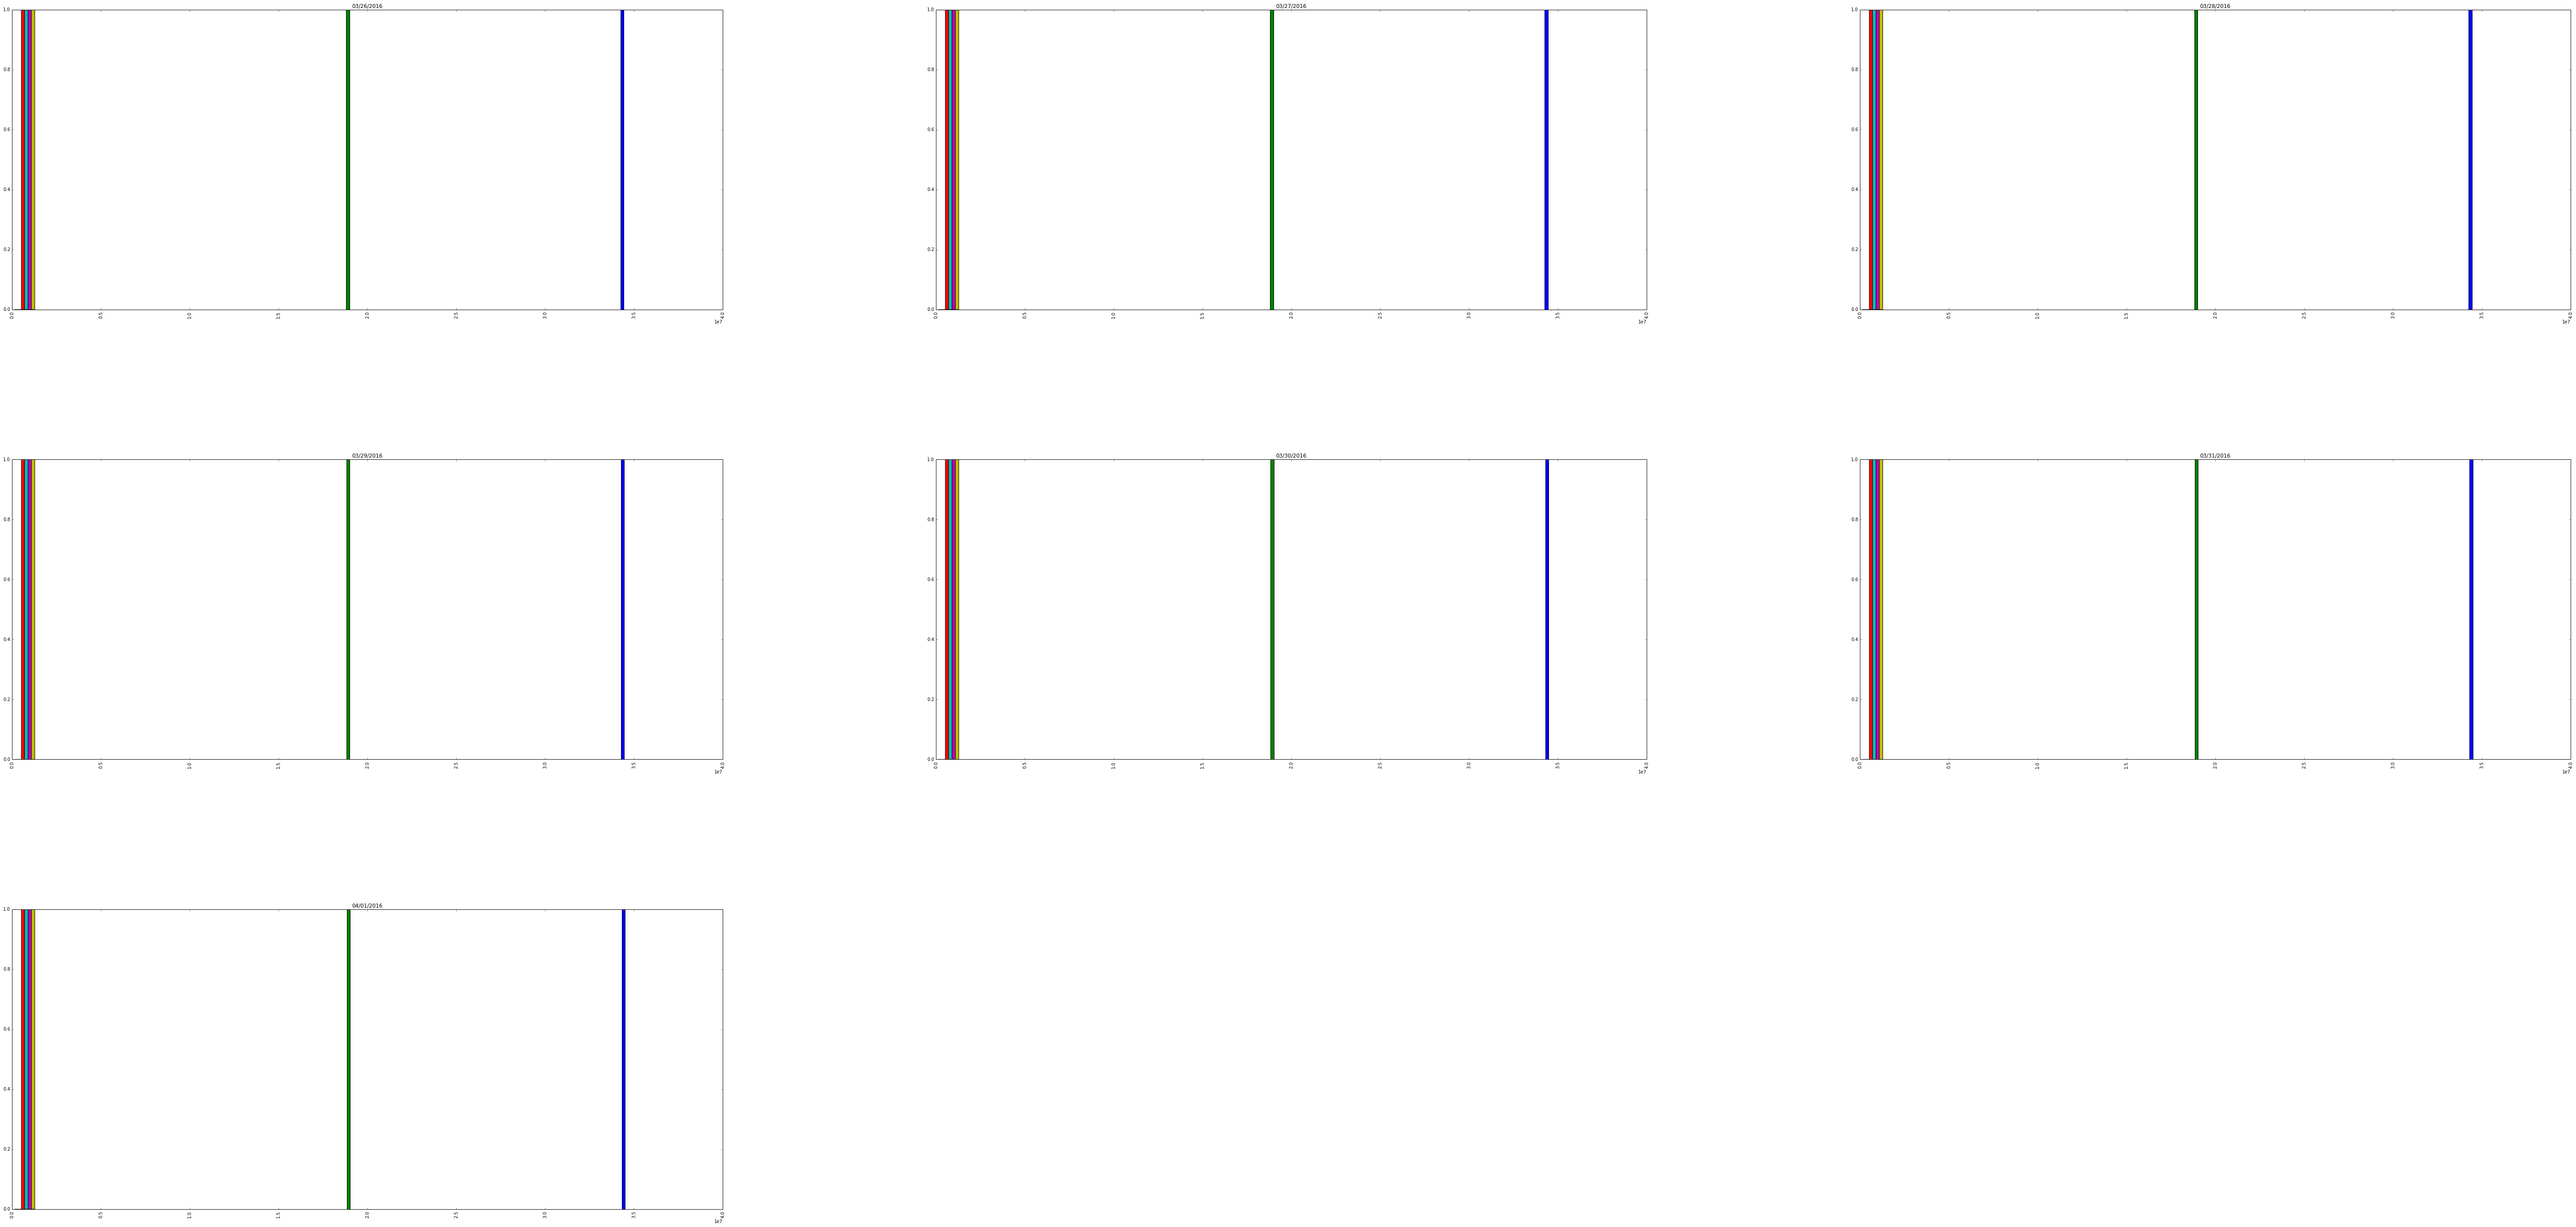

In [65]:
#data_reset[data_reset.STATION=='WORLD TRADE CTR'].dTOTAL.plot(kind='bar');
data_reset[data_reset.STATION=='WORLD TRADE CTR'].hist(by = data_reset.DATE, bins = 25, figsize = (100,50));